
# Machine Learning

<div style="text-align:center" markdown="1">
<img src="https://whatitallboilsdownto.files.wordpress.com/2014/08/downloads.jpg",width=900,height=800>
</div>

<div style="text-align:center" markdown="1">
<img src="http://na2.www.gartner.com/imagesrv/newsroom/images/emerging-tech-hc.png;wa0131df2b233dcd17",width=900,height=800>
</div>



<div style="text-align:center" markdown="1">
<img src="http://na2.www.gartner.com/imagesrv/newsroom/images/emerging-tech-hc-2016.png;wa59f7b006c484099e",width=900,height=800>
</div>



## Superficies de decisiÃ³n con Python

Permiten visualizar las regiones donde es mas probable que "caiga" el siguiente caso

In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import sklearn

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<div style="text-align:center" markdown="1">
<img src="http://scikit-learn.org/stable/_static/ml_map.png",width=900,height=800>
</div>

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Carga de datos

Vamos a guardar los datos del dataset Iris en estas variables:
   - X: CaracterÃ­sticas de los individuos (Variables predictoras)
   - Y: Clase de cada individuo

In [3]:
dataset = load_iris()

X = dataset.data
Y = dataset.target

# Queremos solo sepal length y petal width (caracteristicas 0 y 3)
X03 = np.append(X[:,0:1], X[:,3:4], axis=1)

print(X) # Numero de caracteristicas (features)
print(Y) # Clases (ground truth)
print(dataset.data.shape)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

## Diagrama de dispersion

Vamos a generar un diagrama de dispersiÃ³n para poder ver la colocaciÃ³n de los individuos en base a su Sepal length y Petal width.

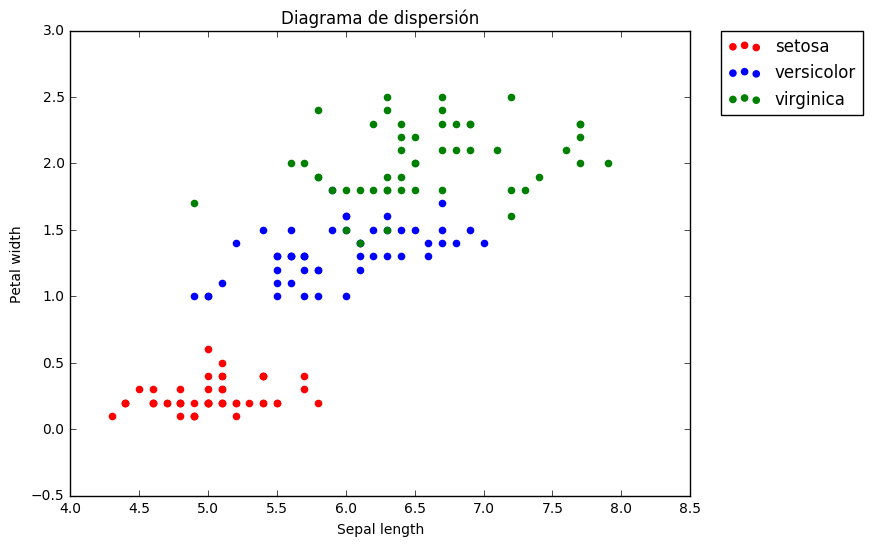

In [4]:
plt.figure(figsize=(8,6)) 

# Diagrama de dispersion de los puntos dividido en las 3 clases
# X[Y==1,0] Valor de la primera columna de X cuya clase sea 1
plt.scatter(X[Y==0,0], X[Y==0,3], color='red', label='setosa') 
plt.scatter(X[Y==1,0], X[Y==1,3], color='blue', label='versicolor')
plt.scatter(X[Y==2,0], X[Y==2,3], color='green', label='virginica')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
   
plt.title('Diagrama de dispersiÃ³n')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

plt.show()

## La caja negra

Algoritmo que utilizamos para generar la superficie de decisiÃ³n de nuestros ejemplos.

In [5]:
def dibujar_superficie_decision(clf):
    # Calculamos los limites de la superficie
    h = 0.01 # Salto entre los valores generados 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 3].min() - 1, X[:, 3].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predecimos las clases para los distintos casos
    Y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.figure(figsize=(8,6))
    
    # Dibujamos las superficies
    plt.contourf(xx, yy, (Y_pred == 0).reshape(xx.shape), 1, cmap='OrRd', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 1).reshape(xx.shape), 1, cmap='Blues', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 2).reshape(xx.shape), 1, cmap='Greens', alpha=.4)

    # Colocamos los individuos
    plt.scatter(X[Y==0,0], X[Y==0,3], color='red', label='setosa')
    plt.scatter(X[Y==1,0], X[Y==1,3], color='blue', label='versicolor')
    plt.scatter(X[Y==2,0], X[Y==2,3], color='green', label='virginica')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.title('Fisher\'s iris dataset')
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')

    plt.show()

## Ejemplo 1:
### Clasificador k-NN 
El clasificador k-NN es un mÃ©todo de clasificaciÃ³n supervisada cuya idea bÃ¡sica (en la que se basa este clasificador) es que un nuevo caso se va a clasificar en la clase mÃ¡s frecuente a la que pertenecen sus K vecinos mÃ¡s cercanos.

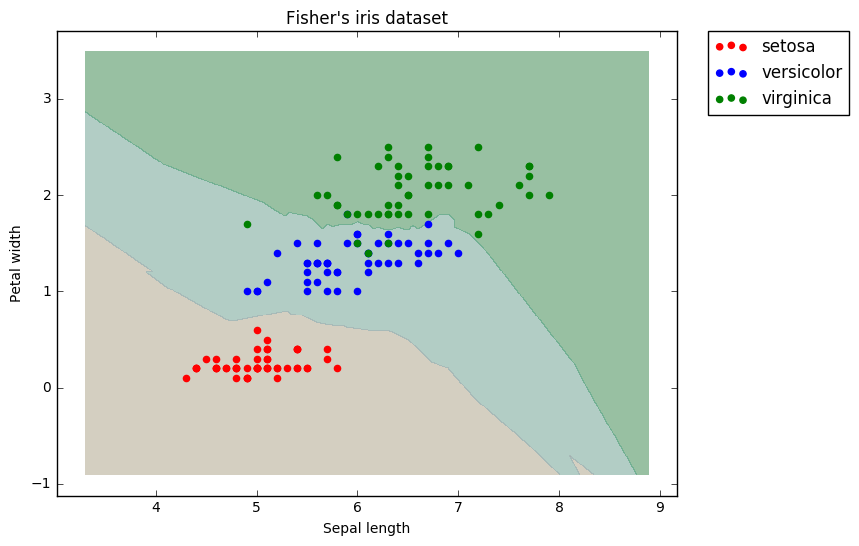

In [6]:
clasificador = KNeighborsClassifier(3)
# Entrenamos nuestro conjunto X03 usando para ello Y
clasificador.fit(X03, Y)
# Dibujamos los datos con el k-NN
dibujar_superficie_decision(clasificador)

## Ejemplo 2:
### Clasificador SVM
El clasificador SVM es un modelo que representa a los puntos de muestra en el espacio. Separa las clases a dos espacios lo mÃ¡s amplios posibles mediante un hiperplano de separaciÃ³n definido como el vector entre los 2 puntos, de las 2 clases, mas cercanos al que se llama vector soporte.

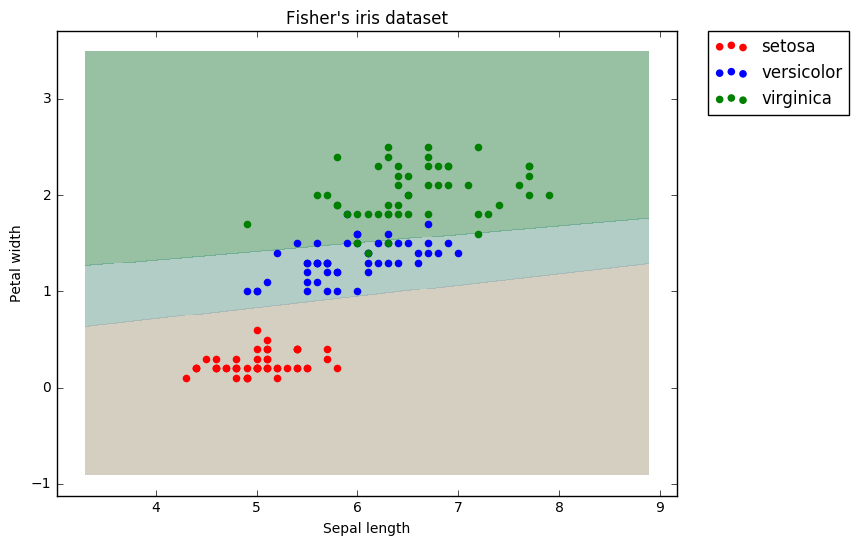

In [7]:
# LinearSVM se usa cuando hay menos de 100.000 casos.
clasificador = LinearSVC()
#Â Train
clasificador.fit(X03, Y)

dibujar_superficie_decision(clasificador)

## Ejemplo 3:
### Clasificador Random Forest
El clasificador Random Forest es una tÃ©cnica de agregaciÃ³n que mejora la precisiÃ³n en la clasificaciÃ³n mediante la incorporaciÃ³n de aleatoriedad en la construcciÃ³n de cada clasificador individual.

Esta aleatorizaciÃ³n puede introducirse en la particiÃ³n del espacio (construcciÃ³n del Ã¡rbol), asÃ­ como en la muestra de entrenamiento.

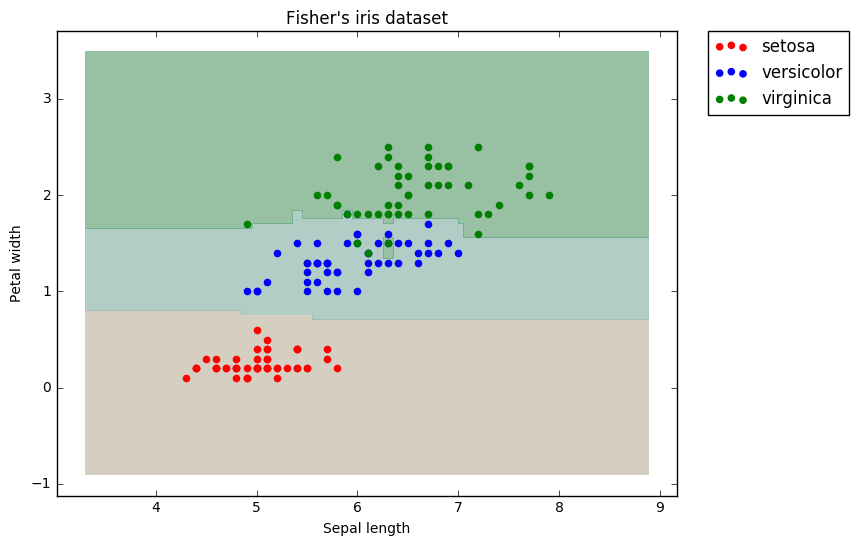

In [8]:
clasificador = RandomForestClassifier()
#Â Train
clasificador.fit(X03, Y)

dibujar_superficie_decision(clasificador)


<img src="https://github.com/anfederico/Clairvoyant/raw/master/media/Learning.gif",width=500,height=600>

Para que podais probar y ver las superficies de decision en acciÃ³n:

http://playground.tensorflow.org/